In [7]:
# Your code here
import pandas as pd

df = pd.read_csv('../data/raw/River_Arno.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8217 non-null   object 
 1   Rainfall_Le_Croci          6026 non-null   float64
 2   Rainfall_Cavallina         6026 non-null   float64
 3   Rainfall_S_Agata           6026 non-null   float64
 4   Rainfall_Mangona           6026 non-null   float64
 5   Rainfall_S_Piero           6026 non-null   float64
 6   Rainfall_Vernio            4283 non-null   float64
 7   Rainfall_Stia              1283 non-null   float64
 8   Rainfall_Consuma           1283 non-null   float64
 9   Rainfall_Incisa            4568 non-null   float64
 10  Rainfall_Montevarchi       1647 non-null   float64
 11  Rainfall_S_Savino          1283 non-null   float64
 12  Rainfall_Laterina          1283 non-null   float64
 13  Rainfall_Bibbiena          2378 non-null   float

In [8]:
ts = pd.DataFrame()
ts['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
ts['Hyd']= df['Hydrometry_Nave_di_Rosano']
ts.index = ts['Date']
ts.drop(columns='Date',axis=1, inplace=True)

ts

,Hyd
Date,
1998-01-01,1.82
1998-01-02,1.94
1998-01-03,2.11
1998-01-04,1.84
1998-01-05,1.88
...,...
2020-06-26,1.34
2020-06-27,1.21
2020-06-28,1.30


In [9]:
ts.isnull().sum()

Hyd    48
dtype: int64

In [10]:
ts = ts.interpolate(method='linear')
ts.isnull().sum()

Hyd    0
dtype: int64

In [11]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/10.5 MB 63.8 MB/s eta 0:00:01  Downloading statsmodels-0.14.5-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (10.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 42.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 21.6 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


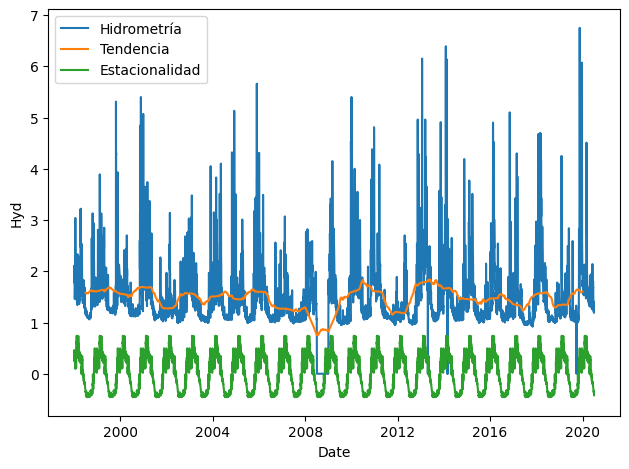

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(ts, period = 365)

trend = decomp.trend
seasonal = decomp.seasonal

import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(data=ts, x = ts.index, y = ts.Hyd,label="Hidrometría")
sns.lineplot(data = trend, label="Tendencia")
sns.lineplot(data=seasonal,label="Estacionalidad")

plt.tight_layout()
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -7.825536e+00
p-value                        6.496928e-12
#Lags Used                     3.700000e+01
Number of Observations Used    8.179000e+03
Critical Value (1%)           -3.431150e+00
Critical Value (5%)           -2.861893e+00
Critical Value (10%)          -2.566958e+00
dtype: float64

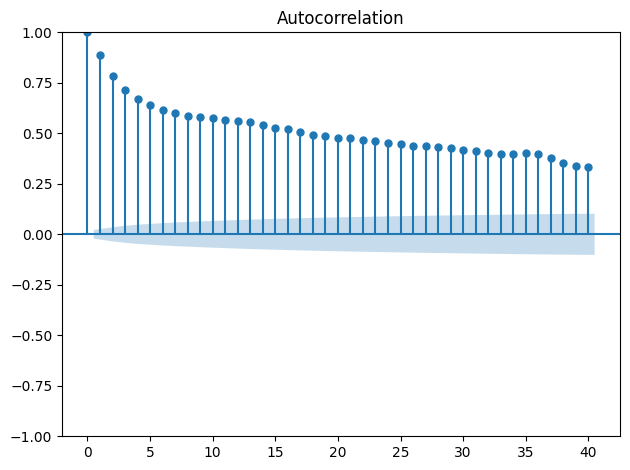

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts)

plt.tight_layout()
plt.show()


In [15]:
from pmdarima import auto_arima

model = auto_arima(ts, seasonal=True, trace=True,m=3)

ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 8217
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1048.359
Date:                Tue, 05 Aug 2025   AIC                           2104.717
Time:                        02:25:31   BIC                           2132.773
Sample:                    01-01-1998   HQIC                          2114.308
                         - 06-30-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6222      0.010     64.259      0.000       0.603       0.641
ma.L1         -0.7225      0.009    -78.190      0.000      -0.741      -0.704
ma.L2         -0.1780      0.006    -32.090      0.000      -0.189      -0.167
sigma2         0.0756      0.000    297.728      0.000       0.075       0.076
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            673373.52
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                             4.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        46.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast = model.predict(n_periods=365)
forecast

/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


2020-07-01    1.348385
2020-07-02    1.366374
2020-07-03    1.377566
2020-07-04    1.384529
2020-07-05    1.388861
                ...   
2021-06-26    1.395996
2021-06-27    1.395996
2021-06-28    1.395996
2021-06-29    1.395996
2021-06-30    1.395996
Freq: D, Length: 365, dtype: float64

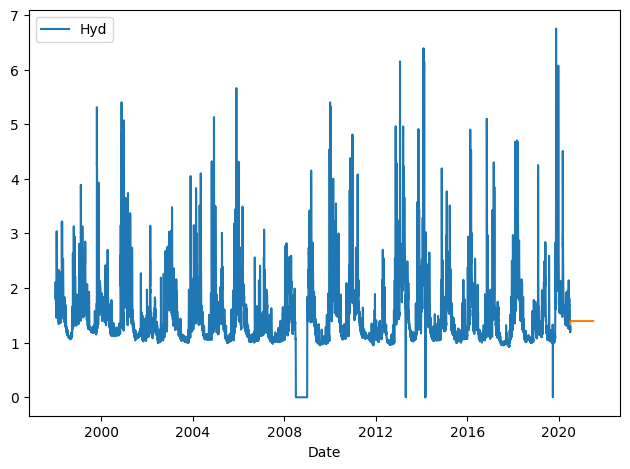

In [ ]:
sns.lineplot(data=ts)
sns.lineplot(data=forecast)

plt.tight_layout()
plt.show()

In [ ]:
!pip install neuralprophet

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 29.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 45.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.4/825.4 kB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 49.2 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.2/821.2 MB 547.0 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.9/981.9 kB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 16.6 MB/s

In [ ]:
ts_np = ts.reset_index()

ts_np

,Date,Hyd
0,1998-01-01,1.82
1,1998-01-02,1.94
2,1998-01-03,2.11
3,1998-01-04,1.84
4,1998-01-05,1.88
...,...,...
8212,2020-06-26,1.34
8213,2020-06-27,1.21
8214,2020-06-28,1.30
8215,2020-06-29,1.19


In [ ]:
ts_np.rename(columns={'Date':'ds','Hyd':'y'},inplace=True)

In [ ]:
from neuralprophet import NeuralProphet

m = NeuralProphet()

metrics = m.fit(ts_np,freq="D")

future = m.make_future_dataframe(ts_np,periods=365)

forecast = m.predict(future)

fig_forecast = m.plot(forecast)

plt.show()

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
/home/vscode/.local/lib/python3.11/site-packages/neuralprophet/df_utils.py:464: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  if df.groupby("ID").apply(lambda x: x.duplicated("ds").any()).any():
/home/vscode/.local/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.988% of the data.
/home/vscod

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (129) is too small than the required number                     for the learning rate finder (247). The results might not be optimal.
/home/vscode/.local/lib/python3.11/site-packages/pytorch_lightning/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.


Finding best initial lr:   0%|          | 0/247 [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 64. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
/home/vscode/.local/lib/python3.11/site-packages/pytorch_lightning/utilities/data.py:79: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 25. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Training: |          | 0/? [00:00<?, ?it/s]

/home/vscode/.local/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.988% of the data.
/home/vscode/.local/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)
/home/vscode/.local/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)
INFO - (NP.df_utils._infer_frequency) - De

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.
/home/vscode/.local/lib/python3.11/site-packages/neuralprophet/plot_forecast_plotly.py:98: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fcst = fcst.fillna(value=np.nan)
/home/vscode/.local/lib/python3.11/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ds = fcst["ds"].dt.to_pydatetime()


In [ ]:
!pip install plotly-resampler

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 40.4 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.9/130.9 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 24.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 19.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 6.2.0
    Uninstalling plotly-6.2.0:
      Successfully uninstalled plotly-6.2.0

[notice] A new release of pip is available: 23.1.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
fig_forecast = m.plot(forecast)



ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.
/home/vscode/.local/lib/python3.11/site-packages/neuralprophet/plot_forecast_plotly.py:98: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/home/vscode/.local/lib/python3.11/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



<Axes: xlabel='Date', ylabel='yhat1'>

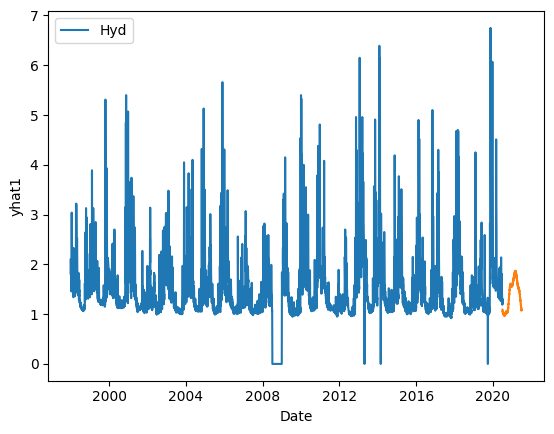

In [ ]:
forecast

sns.lineplot(data=ts)
sns.lineplot(data=forecast,x='ds',y='yhat1')

# Conclusión del análisis y transformaciones

A lo largo de este notebook se realizaron varias transformaciones y análisis sobre la serie temporal de hidrometría del río Arno:

**Transformaciones realizadas:**
- Se cargaron los datos originales desde un archivo CSV.
- Se gestionaron los valores nulos mediante interpolación lineal para asegurar la continuidad de la serie.
- Se transformó la columna de fechas al formato datetime y se estableció como índice del DataFrame.
- Se renombraron columnas para adaptarlas a los modelos de predicción.

**Análisis efectuado:**
- Se realizó una descomposición estacional para identificar la tendencia y la estacionalidad de la serie temporal.
- Se aplicó la prueba de Dickey-Fuller para evaluar la estacionariedad de los datos.
- Se visualizaron las tendencias, estacionalidad y autocorrelación de la serie.
- Se ajustaron modelos de predicción ARIMA y NeuralProphet para pronosticar valores futuros.
- Se compararon los resultados de los modelos mediante visualizaciones gráficas.

Estas transformaciones y análisis permitieron preparar los datos adecuadamente y obtener una visión clara de su comportamiento temporal, facilitando la generación de predicciones confiables para la hidrometría del río Arno.